#### 1. Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#### 2. Load Data

In [3]:
df = pd.read_csv('Match_dataset.csv')
result = pd.read_csv('match_results.csv')

print(f'Match Data: {df.shape}')
print(f'Result Data: {result.shape}')

Match Data: (600, 21)
Result Data: (600, 2)


In [4]:
df.head(15)

,Match_ID,Date,Venue,Team_A,Team_B,Stage,Team_A_Ranking,Team_B_Ranking,Team_A_Form,Team_B_Form,...,HeadToHead_B_Wins,Venue_HomeAdvantage_A,Venue_HomeAdvantage_B,Pitch_Type,Avg_T20_Score_Venue,Toss_Winner,Toss_Decision,Team_A_Tech_Index,Team_B_Tech_Index,Match_Total
0,M0001,2026-03-06,Chennai,New Zealand,Scotland,Super8,5,13,76.97,54.62,...,4,0,0,Spin-Friendly,155,Team_A,Field,251.27,156.37,168
1,M0002,2026-03-07,Mumbai,South Africa,Sri Lanka,Final,6,9,64.19,58.75,...,6,0,0,Flat,175,Team_B,Bat,249.33,187.44,150
2,M0003,2026-03-02,Kolkata,India,PNG,Group,1,20,69.87,45.14,...,0,1,0,Spin-Friendly,165,Team_B,Field,298.24,54.03,160
3,M0004,2026-02-22,Colombo,Netherlands,Ireland,Group,11,12,85.59,61.94,...,4,0,0,Spin-Friendly,160,Team_A,Bat,197.19,174.95,145
4,M0005,2026-02-28,Mumbai,Namibia,South Africa,Group,15,6,45.98,88.52,...,15,0,0,Flat,175,Team_B,Bat,124.91,271.68,185
5,M0006,2026-02-24,Colombo,Afghanistan,USA,Group,8,17,53.35,58.92,...,3,0,0,Spin-Friendly,160,Team_B,Field,204.72,117.29,163
6,M0007,2026-03-02,Ahmedabad,USA,Nepal,Group,17,19,46.84,40.99,...,2,0,0,Flat,180,Team_B,Bat,115.43,76.68,153
7,M0008,2026-02-13,Kolkata,Oman,South Africa,Group,16,6,38.69,71.34,...,4,0,0,Spin-Friendly,165,Team_B,Bat,101.28,248.24,192
8,M0009,2026-02-16,Delhi,Canada,Ireland,Group,18,12,37.61,54.91,...,1,0,0,Pace-Friendly,170,Team_A,Bat,77.14,179.31,166
9,M0010,2026-02-24,Colombo,Pakistan,South Africa,Group,4,6,85.80,61.02,...,2,0,0,Spin-Friendly,160,Team_B,Bat,284.02,241.05,150


In [ ]:
df['Stage'].unique()

array(['Super8', 'Final', 'Group', 'SemiFinal'], dtype=object)

In [12]:
df['Pitch_Type'].unique()

array(['Spin-Friendly', 'Flat', 'Pace-Friendly'], dtype=object)

In [5]:
result.head()

,Match_ID,Winner
0,M0001,Team_A
1,M0002,Team_A
2,M0003,Team_A
3,M0004,Team_A
4,M0005,Team_B


In [6]:
df.shape

(600, 21)

#### 3. Explore Data

In [7]:
# Merge data with result
full_data = df.merge(result, on='Match_ID')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Match_ID               600 non-null    object 
 1   Date                   600 non-null    object 
 2   Venue                  600 non-null    object 
 3   Team_A                 600 non-null    object 
 4   Team_B                 600 non-null    object 
 5   Stage                  600 non-null    object 
 6   Team_A_Ranking         600 non-null    int64  
 7   Team_B_Ranking         600 non-null    int64  
 8   Team_A_Form            600 non-null    float64
 9   Team_B_Form            600 non-null    float64
 10  HeadToHead_A_Wins      600 non-null    int64  
 11  HeadToHead_B_Wins      600 non-null    int64  
 12  Venue_HomeAdvantage_A  600 non-null    int64  
 13  Venue_HomeAdvantage_B  600 non-null    int64  
 14  Pitch_Type             600 non-null    object 
 15  Avg_T2

In [ ]:
full_data.isnull().sum() # ther is no any nan value

Match_ID                 0
Date                     0
Venue                    0
Team_A                   0
Team_B                   0
Stage                    0
Team_A_Ranking           0
Team_B_Ranking           0
Team_A_Form              0
Team_B_Form              0
HeadToHead_A_Wins        0
HeadToHead_B_Wins        0
Venue_HomeAdvantage_A    0
Venue_HomeAdvantage_B    0
Pitch_Type               0
Avg_T20_Score_Venue      0
Toss_Winner              0
Toss_Decision            0
Team_A_Tech_Index        0
Team_B_Tech_Index        0
Match_Total              0
Winner                   0
dtype: int64

In [15]:
full_data['Winner'].value_counts()

Winner
Team_A    318
Team_B    282
Name: count, dtype: int64

In [16]:
full_data.describe()

,Team_A_Ranking,Team_B_Ranking,Team_A_Form,Team_B_Form,HeadToHead_A_Wins,HeadToHead_B_Wins,Venue_HomeAdvantage_A,Venue_HomeAdvantage_B,Avg_T20_Score_Venue,Team_A_Tech_Index,Team_B_Tech_Index,Match_Total
count,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,10.580000,10.365000,61.17865,61.038950,7.768333,7.858333,0.071667,0.041667,166.781667,190.102250,191.911167,167.296667
std,5.821519,5.720108,15.70957,15.172641,6.186149,6.155058,0.258150,0.199993,8.066750,75.612595,74.113008,24.866562
min,1.000000,1.000000,14.71000,13.280000,0.000000,0.000000,0.000000,0.000000,155.000000,47.880000,41.050000,103.000000
25%,6.000000,5.000000,49.92000,51.015000,2.000000,3.000000,0.000000,0.000000,160.000000,123.220000,130.115000,150.750000
50%,11.000000,10.000000,60.89000,61.080000,7.000000,7.000000,0.000000,0.000000,165.000000,191.230000,191.930000,167.000000
75%,16.000000,15.000000,72.83250,71.350000,12.000000,12.000000,0.000000,0.000000,175.000000,251.585000,259.805000,184.250000
max,20.000000,20.000000,95.00000,95.000000,27.000000,29.000000,1.000000,1.000000,180.000000,339.540000,344.430000,243.000000


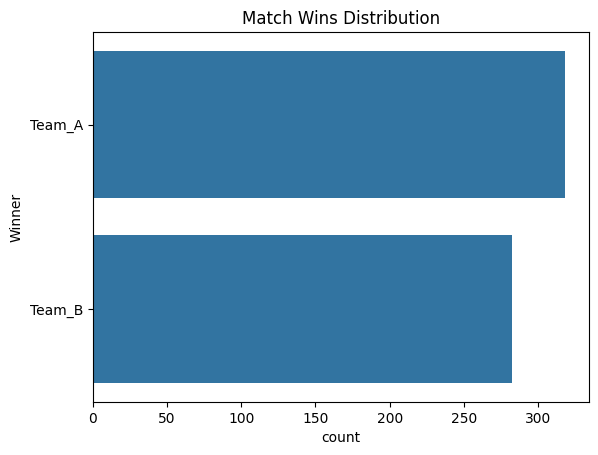

In [27]:
plt.figure()
sns.countplot(y ='Winner', data = full_data)
plt.title("Match Wins Distribution")
plt.show()

In [28]:
# Toss impact
(full_data['Toss_Winner']== full_data['Winner']).value_counts()

False    329
True     271
Name: count, dtype: int64

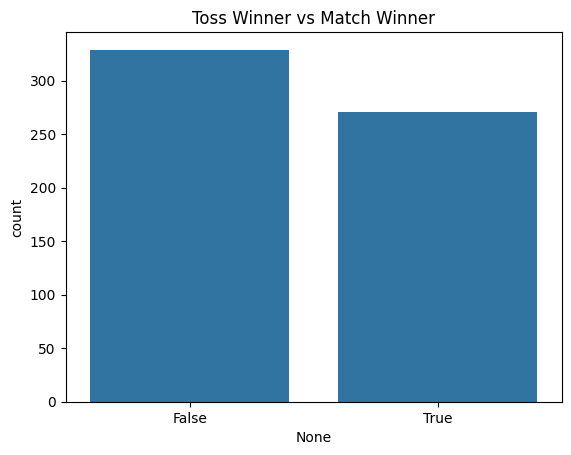

In [29]:
plt.figure()
sns.countplot(x=(full_data["Toss_Winner"] == full_data["Winner"]))
plt.title("Toss Winner vs Match Winner")
plt.show()

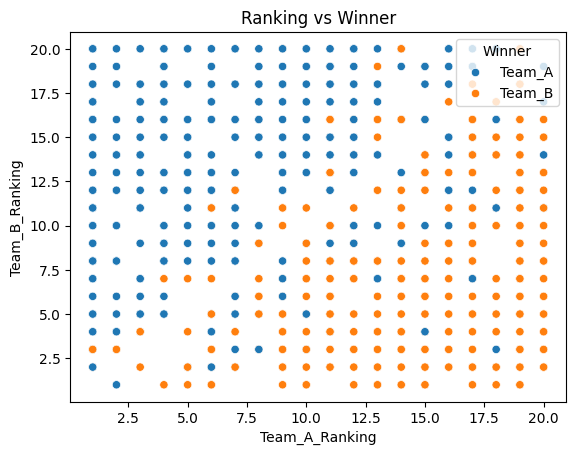

In [31]:
# Rank vs Winning

sns.scatterplot(
    x = 'Team_A_Ranking',
    y = 'Team_B_Ranking',
    hue='Winner',
    data= full_data
)
plt.title('Ranking vs Winner')
plt.show()

In [32]:
full_data["Rank_Diff"] = full_data["Team_A_Ranking"] - full_data["Team_B_Ranking"]

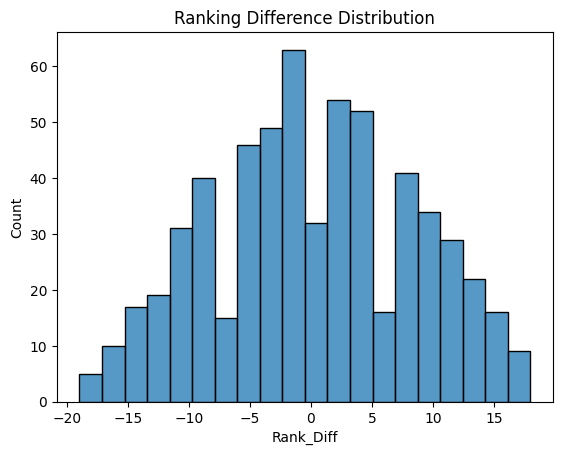

In [33]:
sns.histplot(full_data["Rank_Diff"], bins=20)
plt.title("Ranking Difference Distribution")
plt.show()

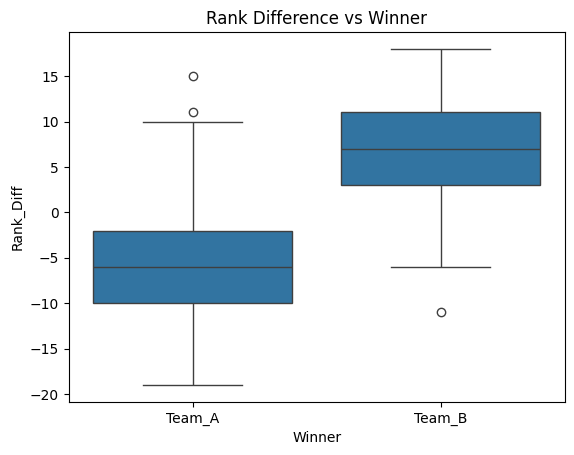

In [34]:
sns.boxplot(x="Winner", y="Rank_Diff", data=full_data)
plt.title("Rank Difference vs Winner")
plt.show()

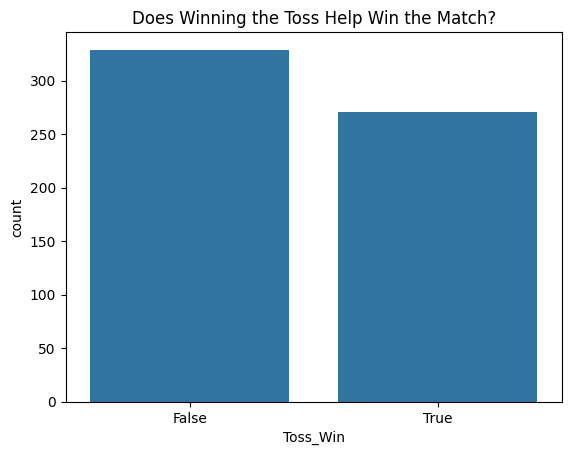

In [35]:
full_data["Toss_Win"] = (full_data["Toss_Winner"] == full_data["Winner"])
sns.countplot(x="Toss_Win", data=full_data)
plt.title("Does Winning the Toss Help Win the Match?")
plt.show()

<Axes: xlabel='Toss_Decision', ylabel='count'>

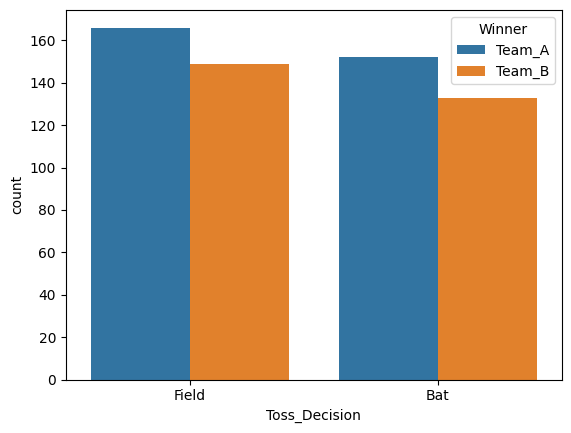

In [42]:
sns.countplot(x="Toss_Decision", hue="Winner", data=full_data)

<Axes: xlabel='Pitch_Type', ylabel='count'>

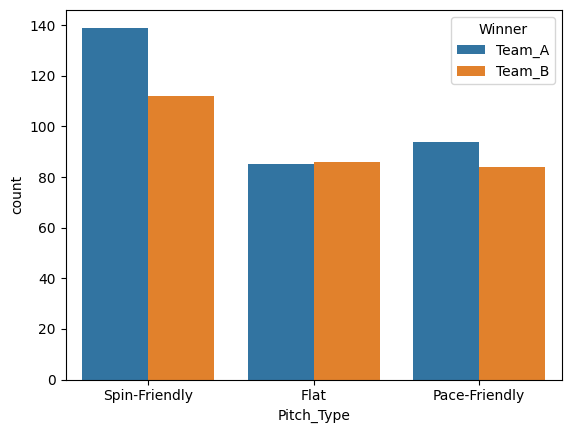

In [43]:
sns.countplot(x="Pitch_Type", hue="Winner", data=full_data)

<Axes: xlabel='Stage', ylabel='count'>

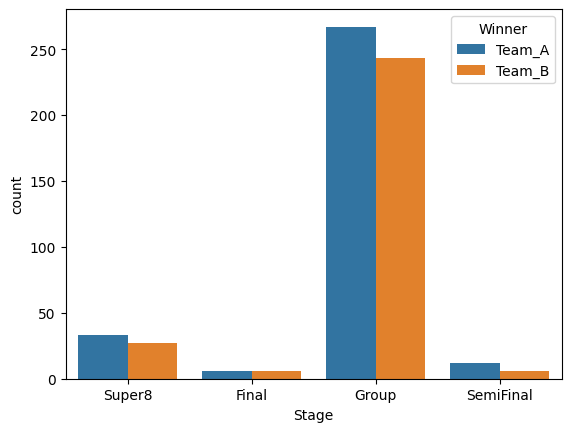

In [44]:
sns.countplot(x="Stage", hue="Winner", data=full_data)

In [37]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

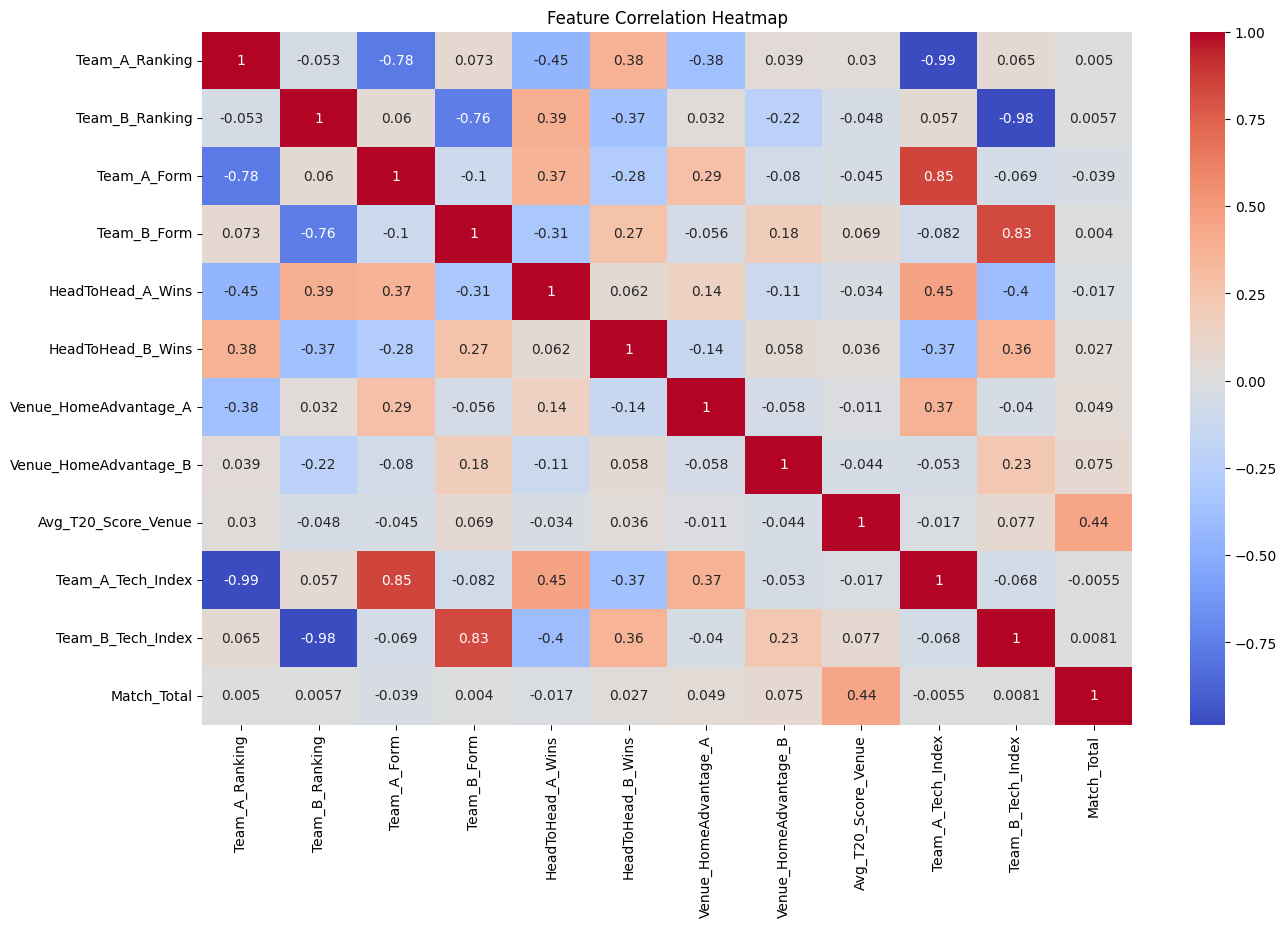

In [41]:
plt.figure(figsize=(15,9))
sns.heatmap(numeric_df.corr(), cmap="coolwarm",annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()